In [1]:
import pandas as pd
import numpy as np
import torch 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


In [2]:
import sys

sys.path.append("C:/Users/OIDL_JB/Desktop/S/py/ex/dacon/DA1_global_rent_prediction/utils")
from plot_Korean import set_korean_font
set_korean_font()


In [3]:
train = pd.read_csv("C:\\Users\\OIDL_JB\\Desktop\\S\\py\\ex\\dacon\\DA1_global_rent_prediction\\data\\train.csv")
test = pd.read_csv("C:\\Users\\OIDL_JB\\Desktop\\S\\py\\ex\\dacon\\DA1_global_rent_prediction\\data\\test.csv")
submission = pd.read_csv("C:\\Users\\OIDL_JB\\Desktop\\S\\py\\ex\\dacon\\DA1_global_rent_prediction\\data\\sample_submission.csv")

In [4]:
train.head()

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418


In [5]:
print(len(train))
print(len(test))
print(len(submission))

8692
8693
8693


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8692 non-null   object 
 1   propertyType            8692 non-null   object 
 2   bedrooms                8692 non-null   int64  
 3   latitude                8692 non-null   float64
 4   longitude               8692 non-null   float64
 5   suburbName              8692 non-null   object 
 6   distanceMetro(km)       8692 non-null   float64
 7   distanceAirport(km)     8692 non-null   float64
 8   distanceHospital(km)    8692 non-null   float64
 9   distanceRailway(km)     8692 non-null   float64
 10  area(square_meters)     8692 non-null   float64
 11  monthlyRent(us_dollar)  8692 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 815.0+ KB


In [7]:
train.describe()

,bedrooms,latitude,longitude,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
count,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,2.119650,28.611199,77.167464,0.869998,13.699359,11.373803,11.419991,101.990737,321.376898
std,0.900757,0.070853,0.093600,1.261337,7.926709,7.500915,7.345131,59.355027,230.962181
min,1.000000,26.467743,76.742523,0.002892,1.901789,0.669150,0.722023,9.290000,14.000000
25%,1.000000,28.563490,77.102028,0.459687,11.152285,8.167231,8.075549,55.740000,159.000000
50%,2.000000,28.616885,77.168053,0.698592,13.139656,10.922441,11.244344,83.610000,258.000000
75%,3.000000,28.651827,77.224998,1.092694,17.225196,15.548549,15.435535,139.350000,393.000000
max,8.000000,28.872597,80.339027,65.866623,396.043067,387.016246,390.969378,882.580000,1476.000000


Text(0, 0.5, '빈도수')

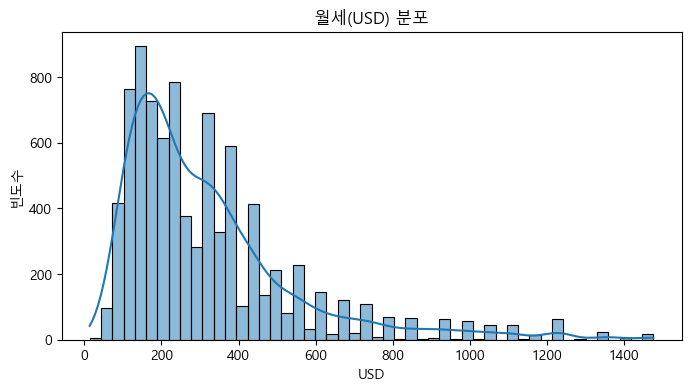

In [39]:
#타겟 데이터 확인

data = train['monthlyRent(us_dollar)']
plt.figure(figsize=(8,4))
sns.histplot(data, kde=True, bins=50)
plt.title('월세(USD) 분포')
plt.xlabel ('USD')
plt.ylabel('빈도수')




In [13]:
import folium
from folium.plugins import MarkerCluster

# 중심 위치 잡기 (평균 좌표)
m = folium.Map(location=[train["latitude"].mean(), train["longitude"].mean()], zoom_start=11)

# 마커 클러스터링
marker_cluster = MarkerCluster().add_to(m)

for idx, row in train.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(marker_cluster)

m.save("map.html")  # HTML로 저장
m  # 주피터에서는 이걸로 지도 바로 표시


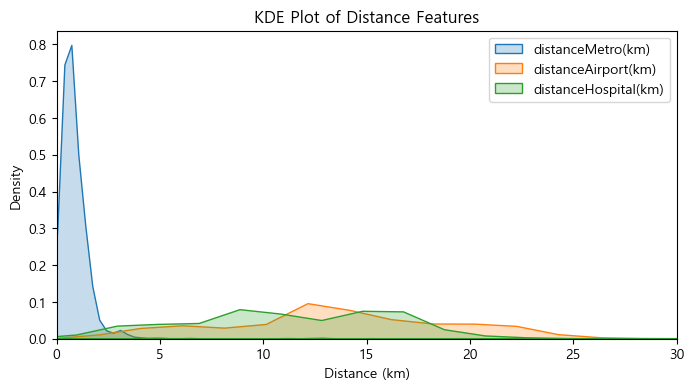

In [40]:
cols = ['distanceMetro(km)', 'distanceAirport(km)', 'distanceHospital(km)']

plt.figure(figsize=(8, 4))
for col in cols:
    sns.kdeplot(train[col], label=col, fill=True)

plt.legend()
plt.title("KDE Plot of Distance Features")
plt.xlabel("Distance (km)")
plt.ylabel("Density")
plt.xlim((0, 30))

plt.show()


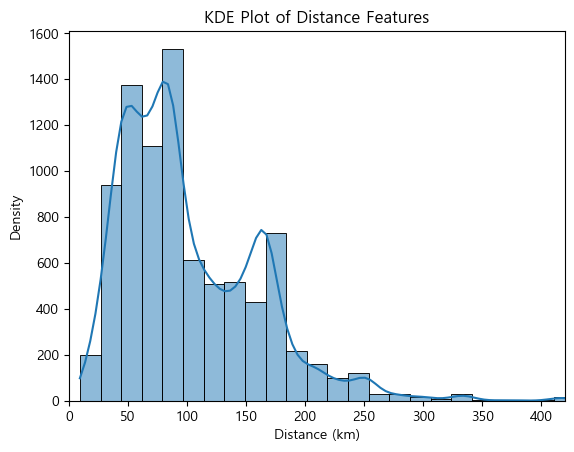

In [43]:
plt.plot(figsize=(10,4))
sns.histplot(train["area(square_meters)"], kde=True, bins=50)
plt.title("KDE Plot of Distance Features")
plt.xlabel("Distance (km)")
plt.ylabel("Density")
plt.xlim(0, 420)
plt.show()

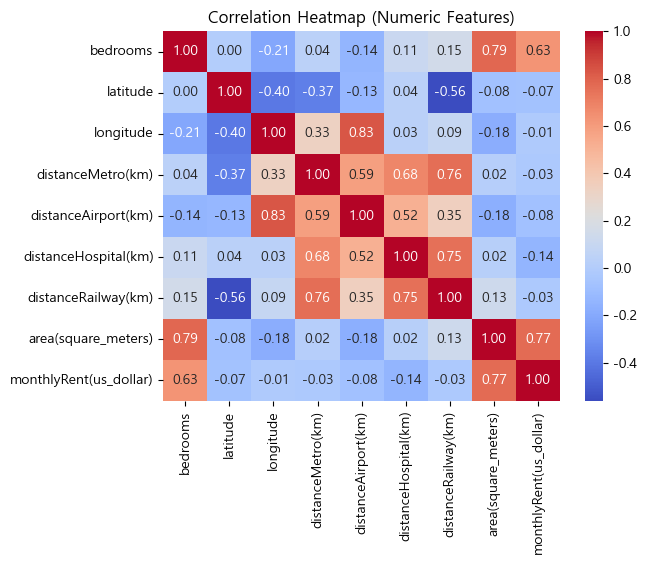

In [45]:
plt.plot(figsize=(8,4))
numeric_data = train.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()